In [1]:
# Kedro initialisation (for notebooks only)
%load_ext kedro.ipython

[08/06/24 18:12:04] INFO     Using                                                                  ]8;id=23801;file:///Users/winsonyeap/miniconda3/envs/credit-card-payment-default-prediction/lib/python3.11/site-packages/kedro/framework/project/__init__.py\__init__.py]8;;\:]8;id=400628;file:///Users/winsonyeap/miniconda3/envs/credit-card-payment-default-prediction/lib/python3.11/site-packages/kedro/framework/project/__init__.py#246\246]8;;\
                             '/Users/winsonyeap/miniconda3/envs/credit-card-payment-default-predict                
                             ion/lib/python3.11/site-packages/kedro/framework/project/rich_logging.                
                             yml' as logging configuration.                                                        

                    INFO     Registered line magic '%reload_kedro'                                   ]8;id=977697;file:///Users/winsonyeap/miniconda3/envs/credit-card-payment-default-prediction/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=219336;file:///Users/winsonyeap/miniconda3/envs/credit-card-payment-default-prediction/lib/python3.11/site-packages/kedro/ipython/__init__.py#58\58]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=236176;file:///Users/winsonyeap/miniconda3/envs/credit-card-payment-default-prediction/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=785438;file:///Users/winsonyeap/miniconda3/envs/credit-card-payment-default-prediction/lib/python3.11/site-packages/kedro/ipython/__init__.py#60\60]8;;\

                    INFO     Resolved project path as: /Users/winsonyeap/Documents/0 Data Science/0 ]8;id=977212;file:///Users/winsonyeap/miniconda3/envs/credit-card-payment-default-prediction/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=486521;file:///Users/winsonyeap/miniconda3/envs/credit-card-payment-default-prediction/lib/python3.11/site-packages/kedro/ipython/__init__.py#175\175]8;;\
                             Study Projects/credit-card-payment-default-prediction.                                
                             To set a different path, run '%reload_kedro <project_root>'                           

[08/06/24 18:12:05] INFO     Kedro project Credit Card Payment Default Prediction                   ]8;id=328069;file:///Users/winsonyeap/miniconda3/envs/credit-card-payment-default-prediction/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=794670;file:///Users/winsonyeap/miniconda3/envs/credit-card-payment-default-prediction/lib/python3.11/site-packages/kedro/ipython/__init__.py#141\141]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=129390;file:///Users/winsonyeap/miniconda3/envs/credit-card-payment-default-prediction/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=913035;file:///Users/winsonyeap/miniconda3/envs/credit-card-payment-default-prediction/lib/python3.11/site-packages/kedro/ipython/__init__.py#142\142]8;;\
                             'pipelines'                                                                           

[08/06/24 18:12:06] INFO     Registered line magic 'run_viz'                                        ]8;id=107635;file:///Users/winsonyeap/miniconda3/envs/credit-card-payment-default-prediction/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=338731;file:///Users/winsonyeap/miniconda3/envs/credit-card-payment-default-prediction/lib/python3.11/site-packages/kedro/ipython/__init__.py#148\148]8;;\

In [2]:
import logging
import sys
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sys.path.append("..")
from src.credit_card_payment_default_prediction.pipelines.data_processing.nodes import preprocess_dtypes

pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)

_logger = logging.getLogger(__name__)
_logger.setLevel(logging.DEBUG)

warnings.filterwarnings("ignore")

In [3]:
# Listing all the datasets in the catalog
catalog.list()

['train_dataset', 'test_dataset', 'preprocessed_train_data', 'preprocessed_test_data', 'parameters']

In [4]:
# Loading datasets
train_df = catalog.load("train_dataset")
test_df = catalog.load("test_dataset")

[08/06/24 18:12:07] INFO     Loading data from train_dataset (CSVDataset)...                    ]8;id=380270;file:///Users/winsonyeap/miniconda3/envs/credit-card-payment-default-prediction/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=757271;file:///Users/winsonyeap/miniconda3/envs/credit-card-payment-default-prediction/lib/python3.11/site-packages/kedro/io/data_catalog.py#537\537]8;;\

                    INFO     Loading data from test_dataset (CSVDataset)...                     ]8;id=79307;file:///Users/winsonyeap/miniconda3/envs/credit-card-payment-default-prediction/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=511972;file:///Users/winsonyeap/miniconda3/envs/credit-card-payment-default-prediction/lib/python3.11/site-packages/kedro/io/data_catalog.py#537\537]8;;\

In [5]:
# Checking number of customers (ID) in train and test dataset, and also checking if there are any common customers in both datasets
_logger.debug(f"Number of customers in train dataset: {train_df['ID'].nunique():,}")
_logger.debug(f"Number of customers in test dataset: {test_df['ID'].nunique():,}")

common_customers = set(train_df['ID'].unique()).intersection(set(test_df['ID'].unique()))
_logger.debug(f"Number of common customers in train and test dataset: {len(common_customers):,}")

                    DEBUG    Number of customers in train dataset: 21,000                            ]8;id=419858;file:///var/folders/r9/18jz_4sx72x01pjrtpm3clqc0000gn/T/ipykernel_54691/785246413.py\785246413.py]8;;\:]8;id=143300;file:///var/folders/r9/18jz_4sx72x01pjrtpm3clqc0000gn/T/ipykernel_54691/785246413.py#2\2]8;;\

                    DEBUG    Number of customers in test dataset: 9,000                              ]8;id=531664;file:///var/folders/r9/18jz_4sx72x01pjrtpm3clqc0000gn/T/ipykernel_54691/785246413.py\785246413.py]8;;\:]8;id=818689;file:///var/folders/r9/18jz_4sx72x01pjrtpm3clqc0000gn/T/ipykernel_54691/785246413.py#3\3]8;;\

                    DEBUG    Number of common customers in train and test dataset: 0                 ]8;id=126967;file:///var/folders/r9/18jz_4sx72x01pjrtpm3clqc0000gn/T/ipykernel_54691/785246413.py\785246413.py]8;;\:]8;id=44552;file:///var/folders/r9/18jz_4sx72x01pjrtpm3clqc0000gn/T/ipykernel_54691/785246413.py#6\6]8;;\

### Data Dictionary

- `ID` - Unique ID of each client
- `LIMIT_BAL` - Amount of given credit (NT dollars): It includes both the individual consumer credit and his/her family (supplementary) credit
- `SEX` - Gender (1=male, 2=female)
- `EDUCATION` - (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- `MARRIAGE` - Marital status (1=married, 2=single, 3=divorced)
- `AGE` - Age of the client
- `PAY_0` - Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- `PAY_2` - Repayment status in August, 2005 (scale same as above)
- `PAY_3` - Repayment status in July, 2005 (scale same as above)
- `PAY_4` - Repayment status in June, 2005 (scale same as above)
- `PAY_5` - Repayment status in May, 2005 (scale same as above)
- `PAY_6` - Repayment status in April, 2005 (scale same as above)
- `BILL_AMT1` - Amount of bill statement in September, 2005 (NT dollar)
- `BILL_AMT2` - Amount of bill statement in August, 2005 (NT dollar)
- `BILL_AMT3` - Amount of bill statement in July, 2005 (NT dollar)
- `BILL_AMT4` - Amount of bill statement in June, 2005 (NT dollar)
- `BILL_AMT5` - Amount of bill statement in May, 2005 (NT dollar)
- `BILL_AMT6` - Amount of bill statement in April, 2005 (NT dollar)
- `PAY_AMT1` - Amount of previous payment in September, 2005 (NT dollar)
- `PAY_AMT2` - Amount of previous payment in August, 2005 (NT dollar)
- `PAY_AMT3` - Amount of previous payment in July, 2005 (NT dollar)
- `PAY_AMT4` - Amount of previous payment in June, 2005 (NT dollar)
- `PAY_AMT5` - Amount of previous payment in May, 2005 (NT dollar)
- `PAY_AMT6` - Amount of previous payment in April, 2005 (NT dollar)
- `default_payment_next_month` - Target Variable: Default payment (1=yes, 0=no)

In [6]:
train_df = preprocess_dtypes(train_df)
train_df.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
20999,18049,90000,Male,HighSchool,Married,44,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1
10325,9895,270000,Female,University,Married,42,0,0,0,0,0,0,225245,211517,165608,223292,220582,218090,10000,118000,113300,9000,8000,10000,0
10028,7008,500000,Female,University,Married,44,0,0,0,0,0,0,38034,39044,38458,39222,40043,40854,1632,1639,1403,1452,1475,1117,0
20975,18961,200000,Female,GraduateSchool,Single,29,-2,-2,-2,-2,-2,-1,-792,-792,-792,-792,-792,69708,0,792,0,0,70500,1688,1
3722,11740,300000,Female,GraduateSchool,Married,47,2,2,2,2,2,2,5000,5000,5000,5000,5000,5000,0,0,0,0,0,0,1


In [7]:
train_df['default_payment_next_month'].value_counts()


default_payment_next_month
0    16355
1     4645
Name: count, dtype: int64

### Missing Data Check

In [8]:
pd.concat([
    pd.DataFrame(train_df.isna().sum()).T.assign(dataset='train').set_index('dataset'),
    pd.DataFrame(test_df.isna().sum()).T.assign(dataset='test').set_index('dataset'),
])

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
dataset,,,,,,,,,,,,,,,,,,,,,,,,,
train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
test,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


### Data Distribution

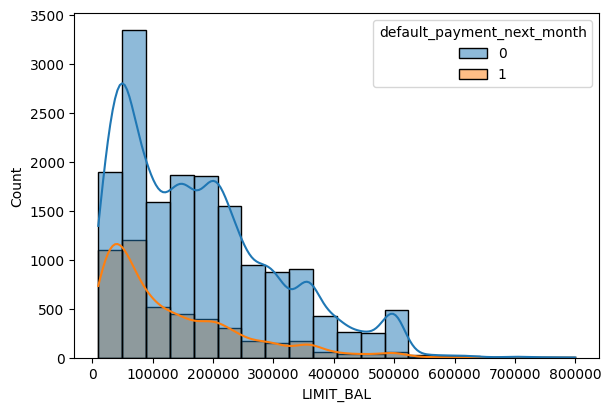

In [9]:
fig, ax = plt.subplots(figsize=(6, 4), constrained_layout=True)
sns.histplot(data=train_df, x='LIMIT_BAL', hue='default_payment_next_month', bins=20, kde=True, ax=ax)
fig.show()